# CS441 Group Project

## Saeah Go, Yifan Zhao

# Importing The Data

In [ ]:
import sys, os
import pandas as pd
import numpy as np
import math
import random
import copy
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
# Download the dataset from my Google Drive account if necessary
if os.path.isfile("/content/Western_Sahara.csv") == False:
  !gdown 1Ze_ZXnvYoKXSabPdyY7oU2h-tDdHxAE_

Downloading...
From: https://drive.google.com/uc?id=1Ze_ZXnvYoKXSabPdyY7oU2h-tDdHxAE_
To: /content/Western_Sahara.csv
100% 717/717 [00:00<00:00, 832kB/s]


In [ ]:
df = pd.read_csv("Western_Sahara.csv", header = None)
dataSet = df.to_numpy(dtype = int)

# Genetic algorithm

In [ ]:
populationSize = 1000
mutationPct = 0.03 # probability that mutation occurs
numGenerations = 50 # the number of maximum iteration

In [ ]:
#Calculate the fitness score by calculating the euclidean distance between cities
def fitnessScore(state):
  dist = 0 # distance
  for i in range(state.shape[0]-1):
    dist += np.linalg.norm(state[i, [1,2]] - state[i+1, [1,2]])

  return dist 

#Generate the first generation randomly. Return the generation states, the fitness score for each state as a list, and the total finess value of the generation
def generateInitialPopulation(dataSet):
  population = []
  fitnessList = []
  totalFitness = 0
  
  for i in range(populationSize):
    #Generate random initial state by shuffling the dataset
    initialState = shuffle(dataSet)
    initialState = np.vstack((initialState, initialState[0]))
    fitness = fitnessScore(initialState)
    fitnessList.append(fitness)
    totalFitness += fitness 
    population.append(initialState)

  return population, fitnessList, totalFitness

#Select parents to crossover, we used tournament selection
def selection(population, fitnessList):
  parents = []
  for i in range(2):
    population = shuffle(population)
    population100 = population[0:100]
    fitness100 = []
    for j in range(len(population100)):
      fitness = fitnessScore(population100[j])
      fitness100.append(fitness)
    minimum = np.argmin(fitness100)
    parent = population100[minimum]
    parents.append(parent)
  return parents

def createChild(parent1, parent2):
  cityIdx1 = set()
  childP1 = [] 
  childP2 = []

  geneA = random.randint(0, 28)
  geneB = random.randint(0, 28)
  
  startGene = min(geneA, geneB)
  endGene = max(geneA, geneB)

  if startGene == endGene:
    return parent1

  for i in range(startGene, endGene):
    childP1.append(parent1[i])
    cityIdx1.add(parent1[i,0])
  childP1 = np.array(childP1)
  
  for item in parent2: 
    if item[0] not in cityIdx1:
      childP2.append(item) 
  childP2 = np.array(childP2)

  child = np.concatenate((childP1, childP2), axis = 0)

  return child

#Crossover two chromosomes and mutate to have new offspring
def crossover(parents):
  
  offspring = []
  offspringFitness = []
  totalFitness = 0

  parent1 = parents[0]
  parent1 = parent1[:-1] 
  parent2 = parents[1]
  parent2 = parent2[:-1] 


  child1 = createChild(parent1, parent2)
  child2 = createChild(parent1, parent2)
  
  #Mutate
  child1 = mutation(child1)
  child2 = mutation(child2)

  child1 = np.vstack((child1, child1[0]))
  child2 = np.vstack((child2, child2[0]))

  #Calculate Fitness
  child1Fitness = fitnessScore(child1)
  child2Fitness = fitnessScore(child2)

  offspring.append(child1)
  offspring.append(child2)
  offspringFitness.append(child1Fitness)
  offspringFitness.append(child2Fitness)
  totalFitness = child1Fitness + child2Fitness
  
  return offspring, offspringFitness, totalFitness

#Implement Mutation to a single chromosome which occurs in a small probability
def mutation(chromosome):
  #if the small probability occurs, mutate by swapping two cities
  if random.random() < mutationPct:
    city1 = random.randrange(29)
    for i in range(10):
      city2 = random.randrange(29)
      if city2 != city1:
        break  

    chromosome[[city1, city2]] = chromosome[[city2, city1]]
  return chromosome

#Complete process of generating a new generation
def evolve(generation, fitnessList):
  newGeneration = []
  newFitnessList = []
  totalFitness = 0

  for i in range(int(populationSize / 2)):
    parents = selection(generation, fitnessList)
    offspring, offspringFitness, sum_offspringFitness = crossover(parents)
    newGeneration = [*newGeneration, *offspring]
    newFitnessList = [*newFitnessList, *offspringFitness]
    totalFitness += sum_offspringFitness
  
  return newGeneration, newFitnessList, totalFitness

In [ ]:
#Generate the first generation
initialGeneration, fitnessList, initialTotalFitness = generateInitialPopulation(dataSet)
avgFitness = [initialTotalFitness / populationSize]
generation = copy.deepcopy(initialGeneration)

#Evolve 1000 generations
for i in range(numGenerations):
  generation, fitnessList, totalFitness = evolve(generation, fitnessList)
  avgFitness.append(totalFitness / populationSize)

In [ ]:
#Print an example from the first generation
firstExample = initialGeneration[random.randrange(populationSize)]
print("A random example from the first generation: \n", firstExample[:,0])
print("The total distance of this solution path: \n", fitnessScore(firstExample))

A random example from the first generation: 
 [24 12 14 28 21 27 15 29 17  5  1  6  4 18 10 16 25  9  7 11 26  8  2 19
 22  3 23 13 20 24]
The total distance of this solution path: 
 97459.2286010181


A random example from the final generation: 
 [ 3  4  8  5  1  2  6 10 11 12 15 19 18 20 25 27 24 16 26 28 29 23 22 21
 17 14 13  9  7  3]

The total distance of this solution path:  28955.381809815353


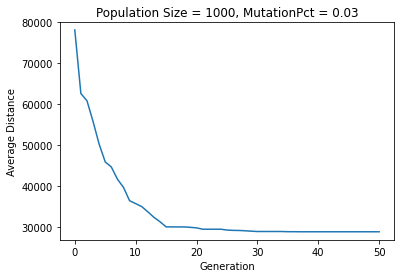

In [ ]:
#Print an example from the last generation
finalExample = generation[random.randrange(populationSize)]
print("A random example from the final generation: \n", finalExample)
print("The total distance of this solution path: \n", fitnessScore(finalExample))

#Draw the plot 
avgFitnessPlot = np.array(avgFitness)
plt.plot(avgFitnessPlot)
plt.ylabel('Average Distance', fontsize = 10)
plt.xlabel('Generation', fontsize = 10)
plt.title('Population Size = 1000, MutationPct = 0.03')
plt.ylim([27000, 80000])
plt.show()

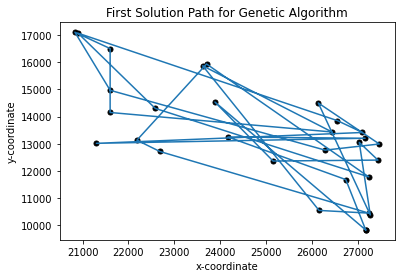

In [ ]:
#Plotting the result for the first solution path
plt.title('First Solution Path for Genetic Algorithm')
plt.scatter(firstExample[:,1], firstExample[:,2], s = 25, color = 'black')
plt.plot(firstExample[:,1], firstExample[:,2])
plt.ylabel('y-coordinate', fontsize = 10)
plt.xlabel('x-coordinate', fontsize = 10)
plt.show()

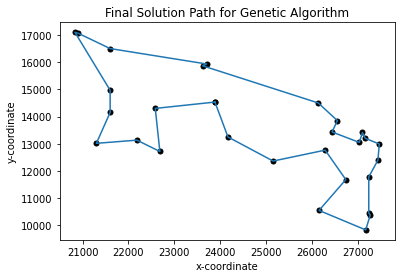

In [ ]:
#Plotting the result for the final solution path
plt.title('Final Solution Path for Genetic Algorithm')
plt.scatter(finalExample[:,1], finalExample[:,2], s = 25, color = 'black')
plt.plot(finalExample[:,1], finalExample[:,2])
plt.ylabel('y-coordinate', fontsize = 10)
plt.xlabel('x-coordinate', fontsize = 10)
plt.show()